Student Feedback Analysis
1. Setup Environment

In [13]:
!pip install textblob wordcloud

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Make plots look nicer
plt.style.use("seaborn-v0_8")

2. Load Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
df = pd.read_csv("Student_feedback.csv")
df.head()

Saving Student_feedback.csv to Student_feedback.csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


3. Data Cleaning

Convert ratings to numeric (in case of missing/dirty values).

Drop unnecessary columns like Unnamed: 0.

In [4]:
# Drop unwanted index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Convert feedback columns to numeric
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,1001.0,500.000000,289.108111,0.0,250.0,500.0,750.0,1000.0
Well versed with the subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
Explains concepts in an understandable way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
Use of presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
Degree of difficulty of assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
Solves doubts willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
Structuring of the course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
Provides support for students going above and beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
Course recommendation based on relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


4. Exploratory Data Analysis (EDA)

4.1 Average Scores for Each Criterion

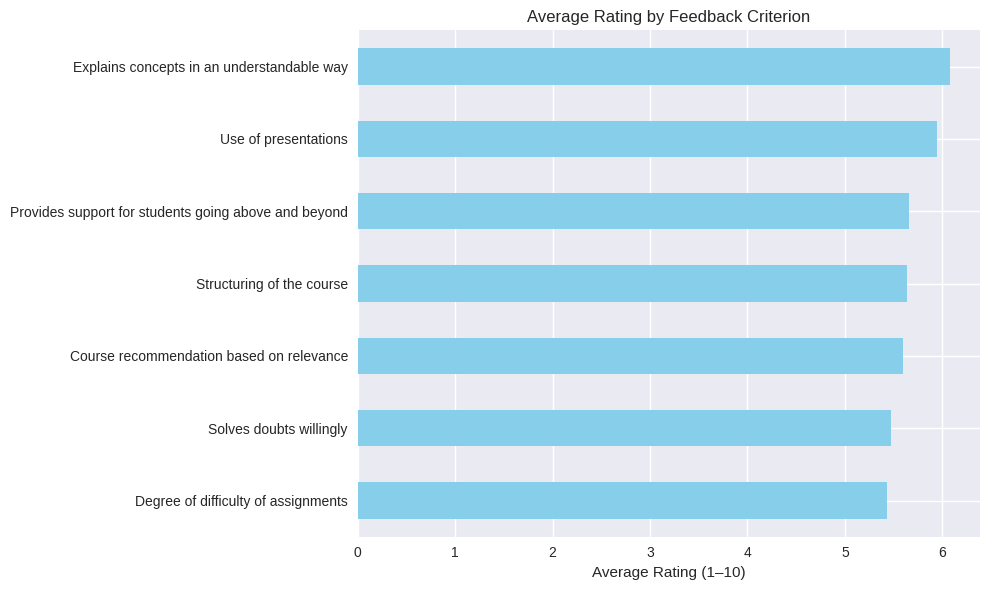

In [5]:
avg_scores = df.iloc[:, 2:].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_scores.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Feedback Criterion')
plt.xlabel('Average Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

This shows which teaching qualities got the highest vs lowest ratings.

4.2 Overall Score per Student

In [6]:
# Add overall score (average of all criteria per student)
df['Overall Score'] = df.iloc[:, 2:].mean(axis=1)

df[['Student ID', 'Overall Score']].head()

,Student ID,Overall Score
0,340,5.000000
1,253,4.714286
2,680,4.000000
3,806,5.428571
4,632,7.428571


4.3 Distribution of Overall Scores

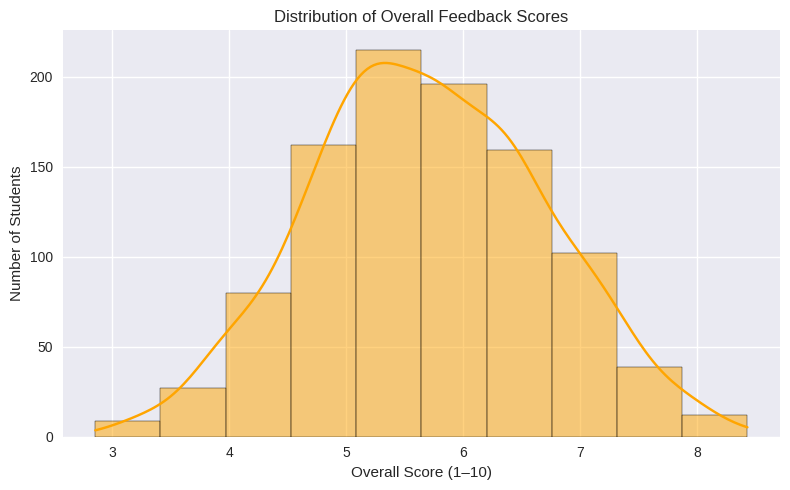

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Overall Score'], bins=10, kde=True, color='orange')
plt.title('Distribution of Overall Feedback Scores')
plt.xlabel('Overall Score (1–10)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.tight_layout()
plt.show()

Helps identify if most students are satisfied (scores clustered high) or not.

4.4 Correlation Heatmap

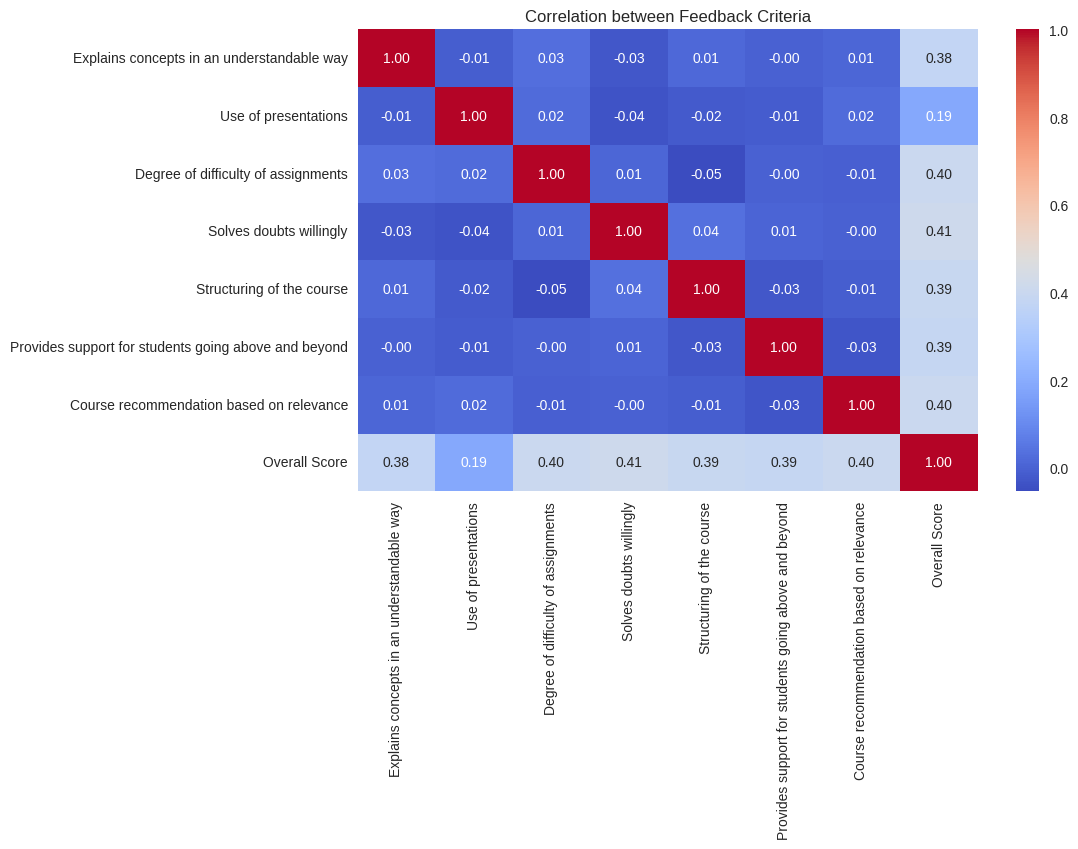

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Feedback Criteria")
plt.show()


Shows relationships, e.g., students who rate “Explains concepts” high also rate “Course recommendation” high.

4.5 Boxplot to Detect Variations

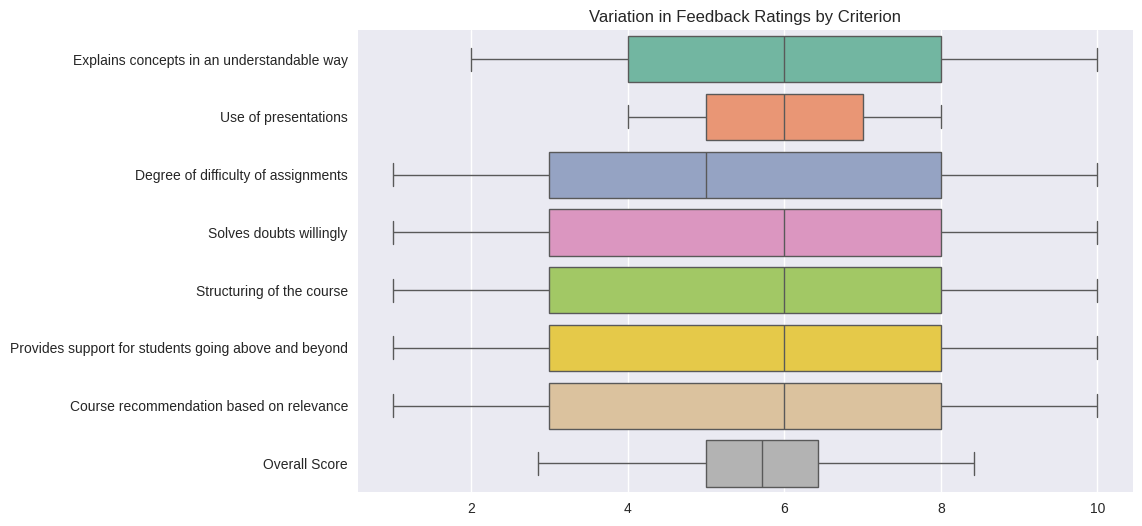

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 2:], orient="h", palette="Set2")
plt.title("Variation in Feedback Ratings by Criterion")
plt.show()

 Helps check which criteria have large disagreement among students.

5. Rename Columns

In [10]:
df = df.rename(columns={
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Concept_Clarity",
    "Use of presentations": "Presentations",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Solving",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Student_Support",
    "Course recommendation based on relevance": "Course_Relevance"
})

6. Distribution of Responses

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


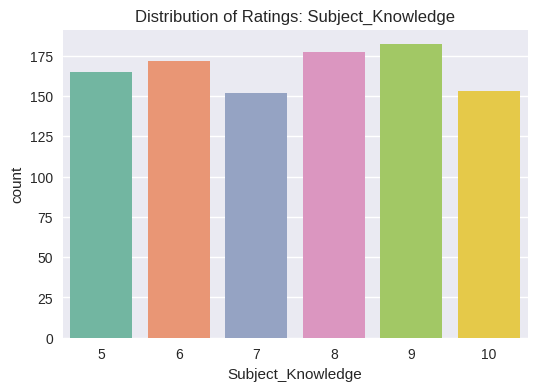

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


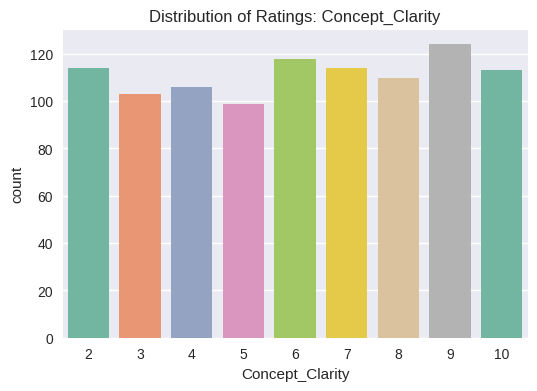

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


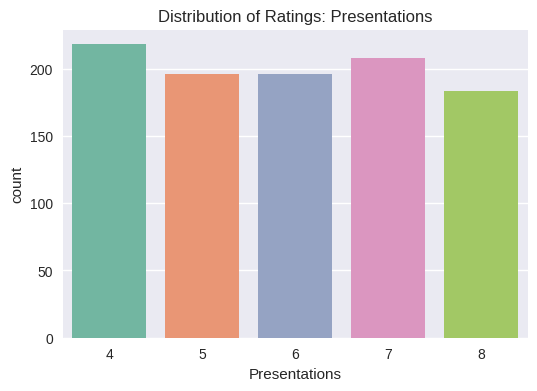

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


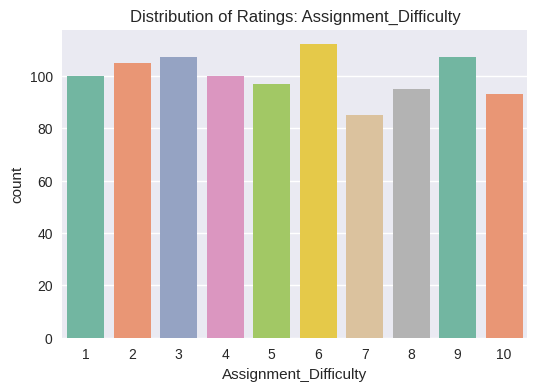

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


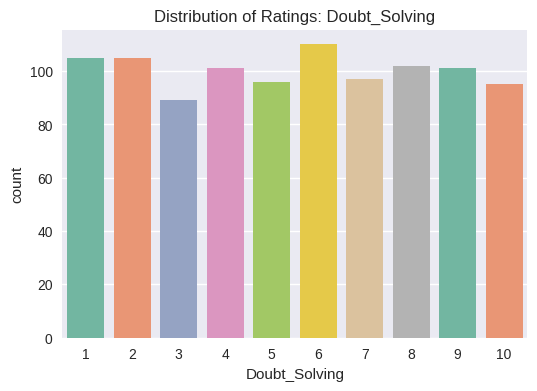

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


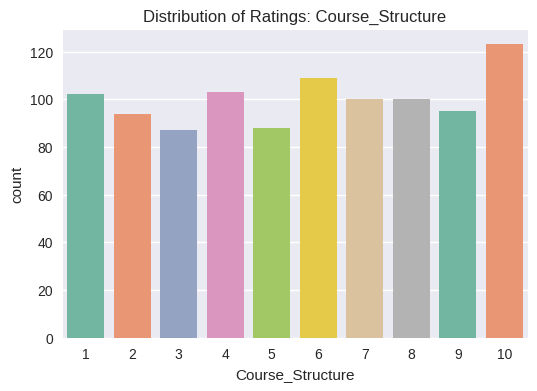

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


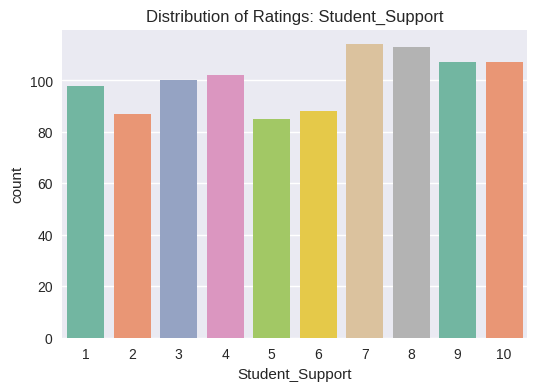

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


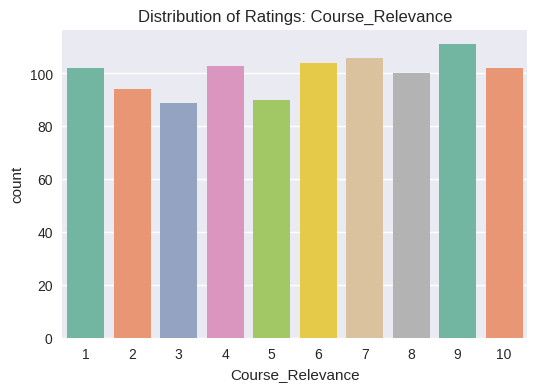

/tmp/ipython-input-4079391991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


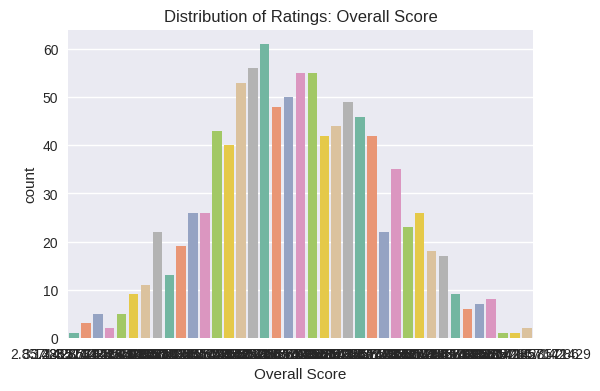

In [11]:
for col in df.columns[1:]:   # skip Student ID
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Distribution of Ratings: {col}")
    plt.show()

8. Sentiment Analysis

In [16]:
import random

# Some example feedback messages
sample_comments = [
    "The event was excellent and very well organized",
    "The seminar was too long and boring",
    "Workshops were useful but timing was inconvenient",
    "Great speakers and informative sessions",
    "The event lacked proper coordination",
    "Loved the interactive activities",
    "Food and refreshments could have been better",
    "The session was engaging and helpful",
    "It was confusing and not well structured",
    "One of the best events I attended"
]

# Add a fake 'Comments' column randomly
df["Comments"] = [random.choice(sample_comments) for _ in range(len(df))]


In [17]:
# Function to get sentiment polarity (-1 = negative, +1 = positive)
df["Sentiment"] = df["Comments"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify into categories
df["Sentiment_Label"] = df["Sentiment"].apply(
    lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral")
)

df[["Comments", "Sentiment", "Sentiment_Label"]].head()

,Comments,Sentiment,Sentiment_Label
0,The event was excellent and very well organized,0.6,Positive
1,The session was engaging and helpful,0.4,Positive
2,It was confusing and not well structured,-0.3,Negative
3,Loved the interactive activities,0.7,Positive
4,It was confusing and not well structured,-0.3,Negative


9. Sentiment Distribution

/tmp/ipython-input-3570251050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment_Label", palette="Set2")


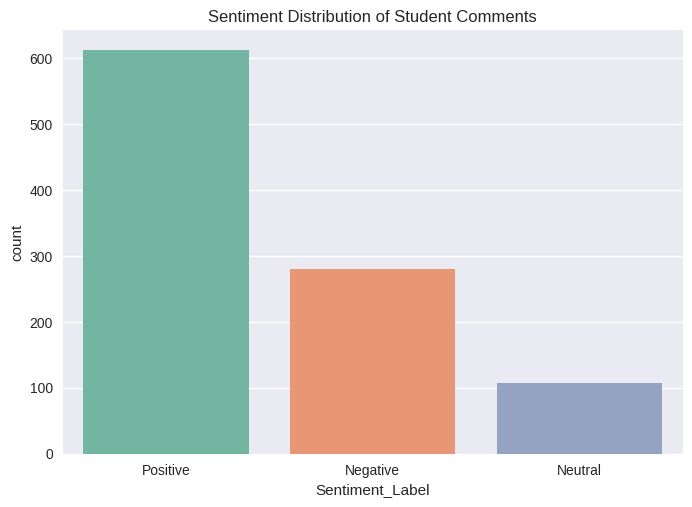

In [18]:
sns.countplot(data=df, x="Sentiment_Label", palette="Set2")
plt.title("Sentiment Distribution of Student Comments")
plt.show()


10. Word Cloud of Common Words

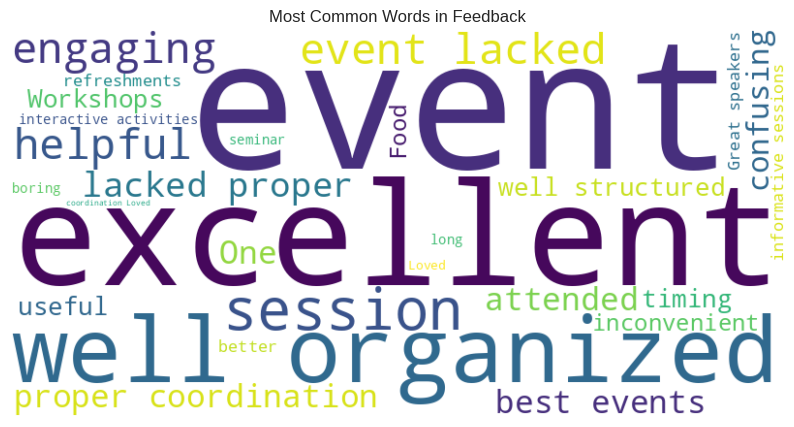

In [19]:
text = " ".join(str(comment) for comment in df["Comments"])

wordcloud = WordCloud(width=800, height=400, background_color="white",
                      stopwords=STOPWORDS, colormap="viridis").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Feedback")
plt.show()

Insights you can get if comments exist:

Which words are most repeated (“teacher”, “assignments”, “helpful”)

How many comments are positive vs negative

Compare sentiment with ratings (e.g., students who gave low scores also used negative words like “confusing”)

8. Export Cleaned Data

In [20]:
df.to_csv("Cleaned_Student_Feedback.csv", index=False)

from google.colab import files
files.download("Cleaned_Student_Feedback.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>